Mounted at /content/drive


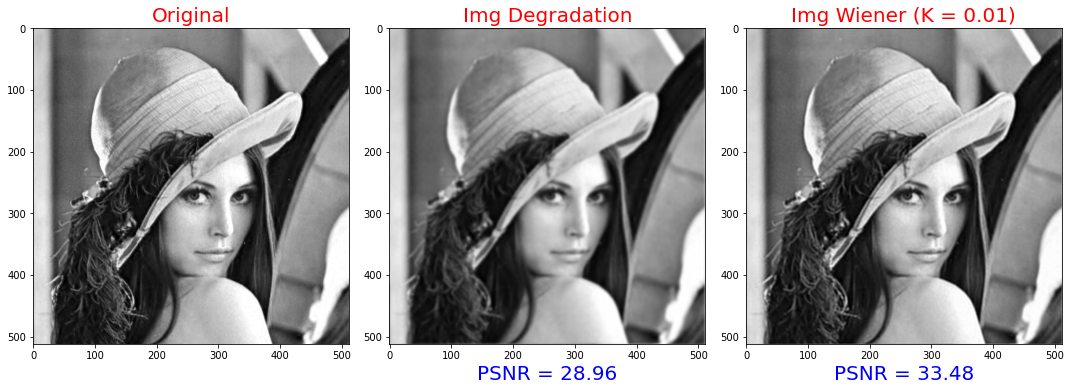

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
from numpy.fft import fft2, ifft2, fftshift

drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/Lenna.bmp", -1)

def PSNR(f, g):
    nr, nc = f.shape[:2]
    MSE = 0.0

    for x in range(nr):
        for y in range(nc):
            MSE += (float(f[x, y]) - float(g[x, y])) ** 2

    MSE /= (nr * nc)

    return (10 * np.log10((255 * 255) / MSE))

def gaussian_lowpass(f, cutoff):
    nr, nc = f.shape[:2]

    fp = np.zeros([nr, nc])

    for x in range(nr):
        for y in range(nc):
            fp[x, y] = pow(-1, x + y) * f[x, y]

    F = fft2(fp)
    G = F.copy()

    for i in range(nr):
        for j in range (nc):
            dist = np.sqrt((i - nr / 2) * (i - nr / 2) +
                    (j - nc / 2) * (j - nc / 2))
            
            H = np.exp(-(dist * dist) / (2 * cutoff * cutoff))
            G[i, j] *= H
    
    gp = ifft2(G)
    gp2 = np.zeros([nr, nc])

    for x in range(nr):
        for y in range(nc):
            gp2[x, y] = round(pow(-1, x + y) * np.real(gp[x, y]), 0)

    return np.uint8(np.clip(gp2, 0, 255))

def wiener_filtering(f, cutoff, k):
    nr, nc = f.shape[:2]

    fp = np.zeros([nr, nc])

    for x in range(nr):
        for y in range(nc):
            fp[x, y] = pow(-1, x + y) * f[x, y] 
    
    F = fft2(fp)
    G = F.copy()

    for i in range(nr):
        for j in range (nc):
            dist = np.sqrt((i - nr / 2) * (i - nr / 2) +
                    (j - nc / 2) * (j - nc / 2))
            
            H = np.exp(-(dist * dist) / (2 * cutoff * cutoff))
            H = H / (H * H + k)
            G[i, j] *= H
    
    gp = ifft2(G)
    gp2 = np.zeros([nr, nc])

    for x in range(nr):
        for y in range(nc):
            gp2[x, y] = round(pow(-1, x + y) * np.real(gp[x, y]), 0)

    return np.uint8(np.clip(gp2, 0, 255))

img_degradation = gaussian_lowpass(img, 50)
img_wiener = wiener_filtering(img_degradation, 50, 0.01)

PSNR_degradation = round(PSNR(img, img_degradation), 2)
PSNR_wiener = round(PSNR(img, img_wiener), 2)

images = [img, img_degradation, img_wiener]
titles = ['Original', 'Img Degradation', 'Img Wiener (K = 0.01)']
labels = ['', 'PSNR = ' + str(PSNR_degradation), 'PSNR = ' + str(PSNR_wiener)]

plt.figure(figsize = (15, 10))

for i in range(3):
    plt.subplot(1, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize = 20, color = 'r')
    plt.xlabel(labels[i], fontsize = 20, color = 'b')
  
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


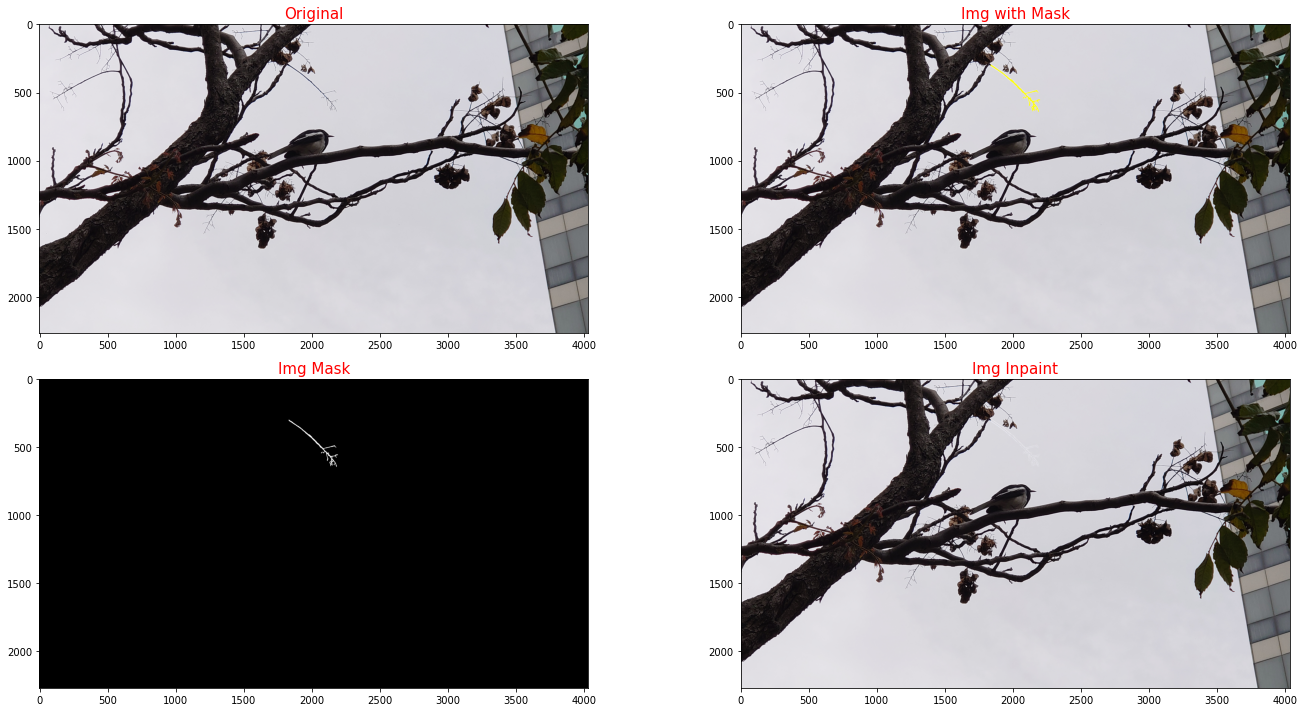

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
from matplotlib import pyplot as plt

drive.mount('/content/drive')
img1 = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/week12.bmp", -1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/week12_with_mask.bmp", -1)

def imgMask(f):
    nr, nc = f.shape[:2]
    mask = np.zeros([nr, nc], dtype = 'uint8')
    for x in range(nr):
        for y in range(nc):
            if f[x, y, 0] == 0 and f[x, y, 1] == 255 and f[x, y, 2] == 255:
                mask[x,y] = 255
    return mask

img_mask = imgMask(img2)
img_inpaint = cv2.inpaint(img2, img_mask, 3, cv2.INPAINT_NS)
img_inpaint = cv2.cvtColor(img_inpaint, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

images = [img1, img2, img_mask, img_inpaint]
titles = ['Original', 'Img with Mask', 'Img Mask', 'Img Inpaint']
plt.figure(figsize = (20, 10))

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i], fontsize = 15, color = 'r')

plt.tight_layout()
plt.show()